In [96]:
#import nececssary libraries
import pandas as pd
import numpy as np

In [97]:
#importing the diamond dataset from seaborn library
import seaborn as sns

df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [99]:
#one hot encode the categorical variables of the data
df = pd.get_dummies(df, prefix=['cut',	'color',	'clarity'])

In [100]:
df.head()

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [101]:
#split the dataset into training and testing data
y = df['price'] #label
x = df.drop('price', axis=1) #features

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [103]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

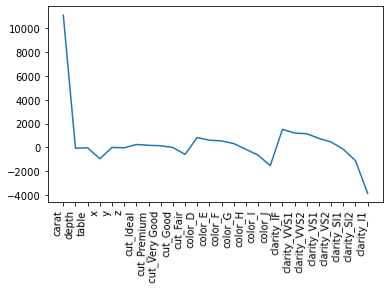

In [104]:
#Showing coefficients of each feature
import matplotlib.pyplot as plt

plt.plot(x.columns, lin_reg.coef_)
plt.gcf().autofmt_xdate(rotation=88)
plt.show()

In [117]:
from sklearn.linear_model import RidgeCV
# define model
ridge = RidgeCV(alphas=np.arange(0.01, 10, 0.01))
# fit model
ridge.fit(X_train, y_train)
# summarize chosen configuration
print('alpha chosen: %f' % ridge.alpha_)

alpha chosen: 1.050000


**Model Evaluation**

In [107]:
#Evaluation of Linear Regression model
from sklearn.metrics import mean_absolute_error

y_pred = lin_reg.predict(X_test)
print("Training score:", lin_reg.score(X_train, y_train))
print("Testing score:", lin_reg.score(X_test, y_test))
print("MAE of linear Regression:", mean_absolute_error(y_test, y_pred), '\n')

Training score: 0.9191326856897061
Testing score: 0.9223304899536335
MAE of linear Regression: 738.9372287609525 



In [118]:
#Evaluation of Ridge Regression model
y_pred = ridge.predict(X_test)
print("Training score:", ridge.score(X_train, y_train))
print("Testing score:", ridge.score(X_test, y_test))
print("MAE of ridge Regression:", mean_absolute_error(y_test, y_pred), '\n')

Training score: 0.919132151370367
Testing score: 0.9223028509247448
MAE of ridge Regression: 739.2574256626814 



Unfortunately, the difference in performance is almost non-existant and this dataset is not really ideal for showcasing ridge regression against linear regression.